## Programming Exercise 1 - Linear Regression

- [warmUpExercise](#warmUpExercise)
- [Linear regression with one variable](#Linear-regression-with-one-variable)
- [Gradient Descent](#Gradient-Descent)

In [5]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

#### warmUpExercise

In [6]:
def warmUpExercise():
    return(np.identity(5))

In [7]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Linear regression with one variable

In [8]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

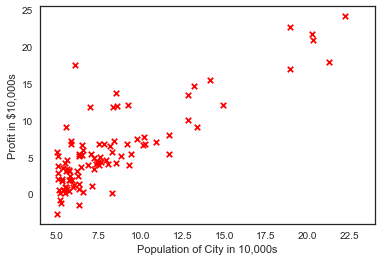

In [9]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

#### Gradient Descent

In [10]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size # n
    J = 0 #rss
    
    h = X.dot(theta) #f or y_hat
    
    J = 1/(2*m)*np.sum(np.square(h-y)) #rss
    
    return(J)

In [11]:
computeCost(X,y)

32.072733877455676

In [12]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size #n
    J_history = np.zeros(num_iters) #rss_history
    
    for iter in np.arange(num_iters):
        h = X.dot(theta) # f
        theta = theta - alpha*(1/m)*(X.T.dot(h-y)) # w
        J_history[iter] = computeCost(X, y, theta) # rss_history
    return(theta, J_history) #(w, rss_history)

theta:  [-3.63029144  1.16636235]


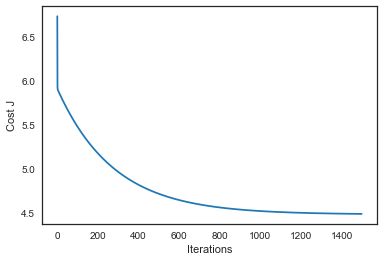

In [13]:
# theta for minimized cost J
theta , Cost_J = gradientDescent(X, y) # f, rss
print('theta: ',theta.ravel()) # f

plt.plot(Cost_J) # f
plt.ylabel('Cost J')  # f
plt.xlabel('Iterations'); 

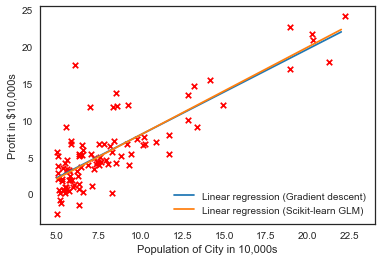

In [10]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx # w[0]+w[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

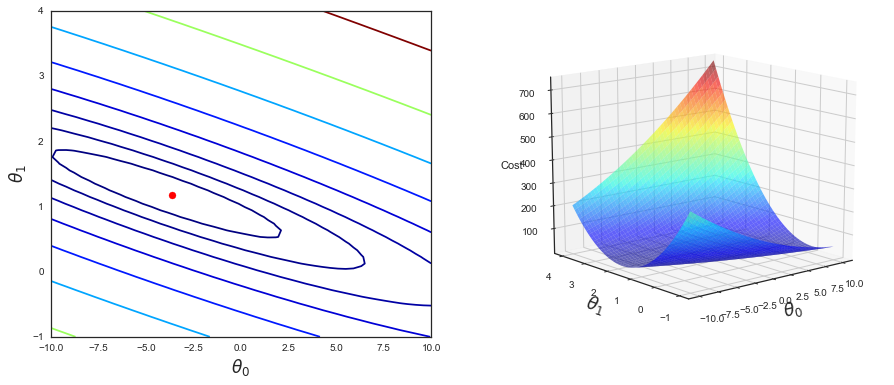

In [12]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

# I tried to try the multi-variate LR but the data couldn't help me :D

In [157]:
data2 = pd.read_csv('data/ex2data1.txt', header=None)

In [184]:
new = data2.values
m2 = len(new[:,-1])
         
X2 = new[:,0:2].reshape(m2,2)
X2 = np.append(np.ones((m2,1)),X2,axis=1)

y2 = new[:,-1].reshape(m2,1)
theta2 = np.zeros((3,1))


In [185]:
def compute_cost(X, y, theta):
    
    m = y.size # n
    J = 0 #rss
    h = X.dot(theta) #f or y_hat
    
    J = 1/(2*m) * np.sum(np.square(h - y)) #rss
    
    return(J)

In [186]:
compute_cost(X2, y2, theta2)

0.3

In [201]:
def gradient_descent(X,y,theta,alpha,num_iters):
    m = len(y)
    J = []
    
    for i in range(num_iters):
        h = X.dot(theta)
        e = np.dot(X.transpose(),(h - y))
        thetai = alpha * 1/m * e
        theta -= thetai
        
        J.append(compute_cost(X,y,theta))
    
    return theta, J

In [202]:
theta2, J = gradient_descent(X2, y2, theta2,0.1,1500)
theta2

array([[nan],
       [nan],
       [nan]])

#  :'( الداتا دي مريضة والله العظيم

# Defining Predict function..

In [24]:
def predict_function(X, theta):
    
    predictions = np.dot(theta.transpose(), X)
    return predictions[0]

In [26]:
profit = predict_function(np.array([1, 5]), theta)
profit * 10000

22015.2031227355